## Solution to Endterm

### Q1 ($\chi^2$ Fit )

In [36]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['science', 'grid', 'ieee'])
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy import stats
from tqdm.auto import tqdm

In [5]:
# Load the data
data = pd.read_csv('endsemfit.txt', sep="\s+", header=None)
data.columns = ['t', 'N', 'sigma_N']

# Define the decay function
def decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

In [6]:
# Perform a chi-square linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['t'], np.log(data['N']))

# Calculate the lifetime and its error
tau = -1 / slope
tau_error = std_err / slope**2

In [7]:
# Check if the fit is acceptable at the 5% level of significance
chi2_val = np.sum(((np.log(data['N']) - (intercept + slope * data['t'])) / data['sigma_N'])**2)
df = len(data['t']) - 2
chi2_critical = chi2.ppf(0.95, df)

print(f"Lifetime: {tau} ± {tau_error}")
print(f"Fit is acceptable at 5% level of significance: {chi2_val < chi2_critical}")

Lifetime: 96.36253898605253 ± 12.844143893726377
Fit is acceptable at 5% level of significance: True


### Q2 fixed point method

In [8]:
# parameters
T = 300 #K
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422

In [9]:
def f_1(v): 
    return (p + a/v**2)*(v - b) - R*T

def g_1(v): 
    return R*T/(p + a/v**2) + b

In [10]:
# f and g
f = f_1
g = g_1

# parameters
xi = 0.01
xf = 1
iterations = 200
x = [xi + (xf - xi) * i / 99 for i in range(100)]

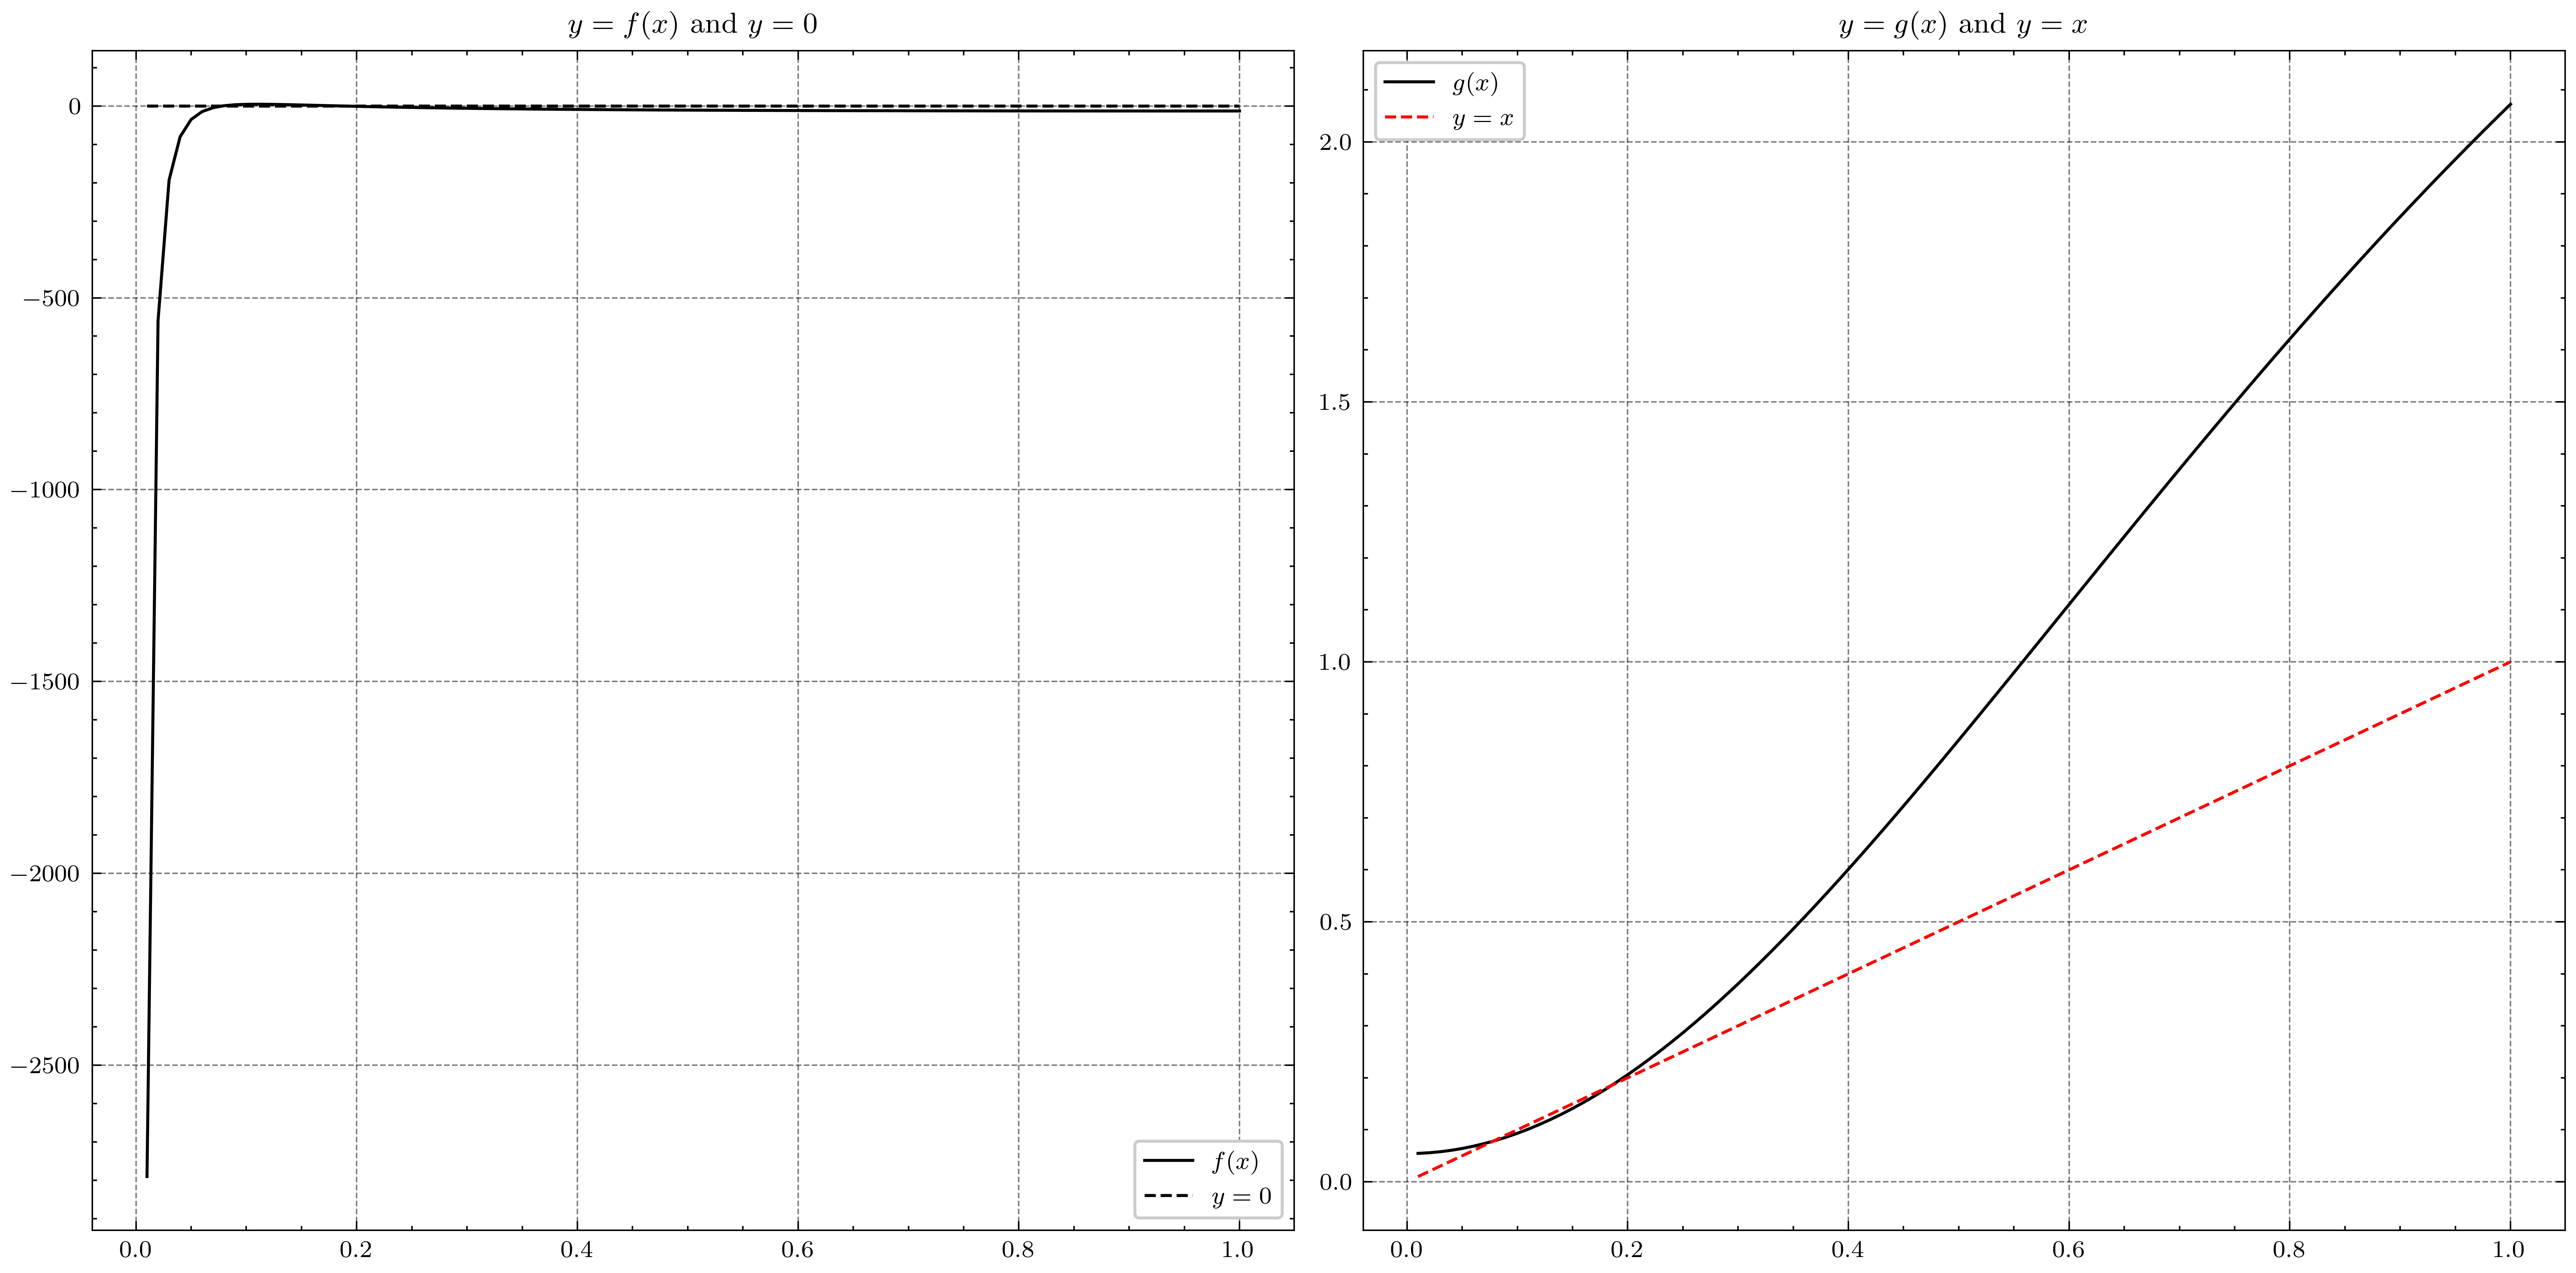

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# f(x)
axs[0].plot(x, [f(xi) for xi in x], label='$f(x)$')
axs[0].plot([xi, xf], [0, 0], 'k--', label='$y=0$')
axs[0].set_title('$y = f(x)$ and $y=0$')
axs[0].grid(True)
axs[0].legend()

# g(x)
axs[1].plot(x, [g(xi) for xi in x], label='$g(x)$')
axs[1].plot(x, x, 'r--', label='$y=x$')
axs[1].set_title('$y = g(x)$ and $y=x$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

The $f(x)$ clearly shows three different roots of the equation and for the first parameterization we will be able to capture the two roots of the equation.

Solving x = g(x) starting to the left, at x_0 = 0.01
x_0 = 0.0546
x_1 = 0.0659
x_2 = 0.0713
x_3 = 0.0741
x_4 = 0.0757
x_5 = 0.0767
x_6 = 0.0773
x_7 = 0.0776
x_8 = 0.0778
x_9 = 0.0779
x_10 = 0.0780
x_11 = 0.0780
x_12 = 0.0781
x_13 = 0.0781
x_14 = 0.0781
x_15 = 0.0781
x_16 = 0.0781
x_17 = 0.0781
x_18 = 0.0781
x_19 = 0.0781
x_20 = 0.0781
x_21 = 0.0781
x_22 = 0.0781
x_23 = 0.0781
x_24 = 0.0781
x_25 = 0.0781
x_26 = 0.0781
x_27 = 0.0781
x_28 = 0.0781
x_29 = 0.0781
x_30 = 0.0781
x_31 = 0.0781
x_32 = 0.0781
x_33 = 0.0781
x_34 = 0.0781
x_35 = 0.0781
x_36 = 0.0781
x_37 = 0.0781
x_38 = 0.0781
x_39 = 0.0781
x_40 = 0.0781
x_41 = 0.0781
x_42 = 0.0781
x_43 = 0.0781
x_44 = 0.0781
x_45 = 0.0781
x_46 = 0.0781
x_47 = 0.0781
x_48 = 0.0781
x_49 = 0.0781
x_50 = 0.0781
x_51 = 0.0781
x_52 = 0.0781
x_53 = 0.0781
x_54 = 0.0781
x_55 = 0.0781
x_56 = 0.0781
x_57 = 0.0781
x_58 = 0.0781
x_59 = 0.0781
x_60 = 0.0781
x_61 = 0.0781
x_62 = 0.0781
x_63 = 0.0781
x_64 = 0.0781
x_65 = 0.0781
x_66 = 0.0781
x_67 = 0.0781
x_68 

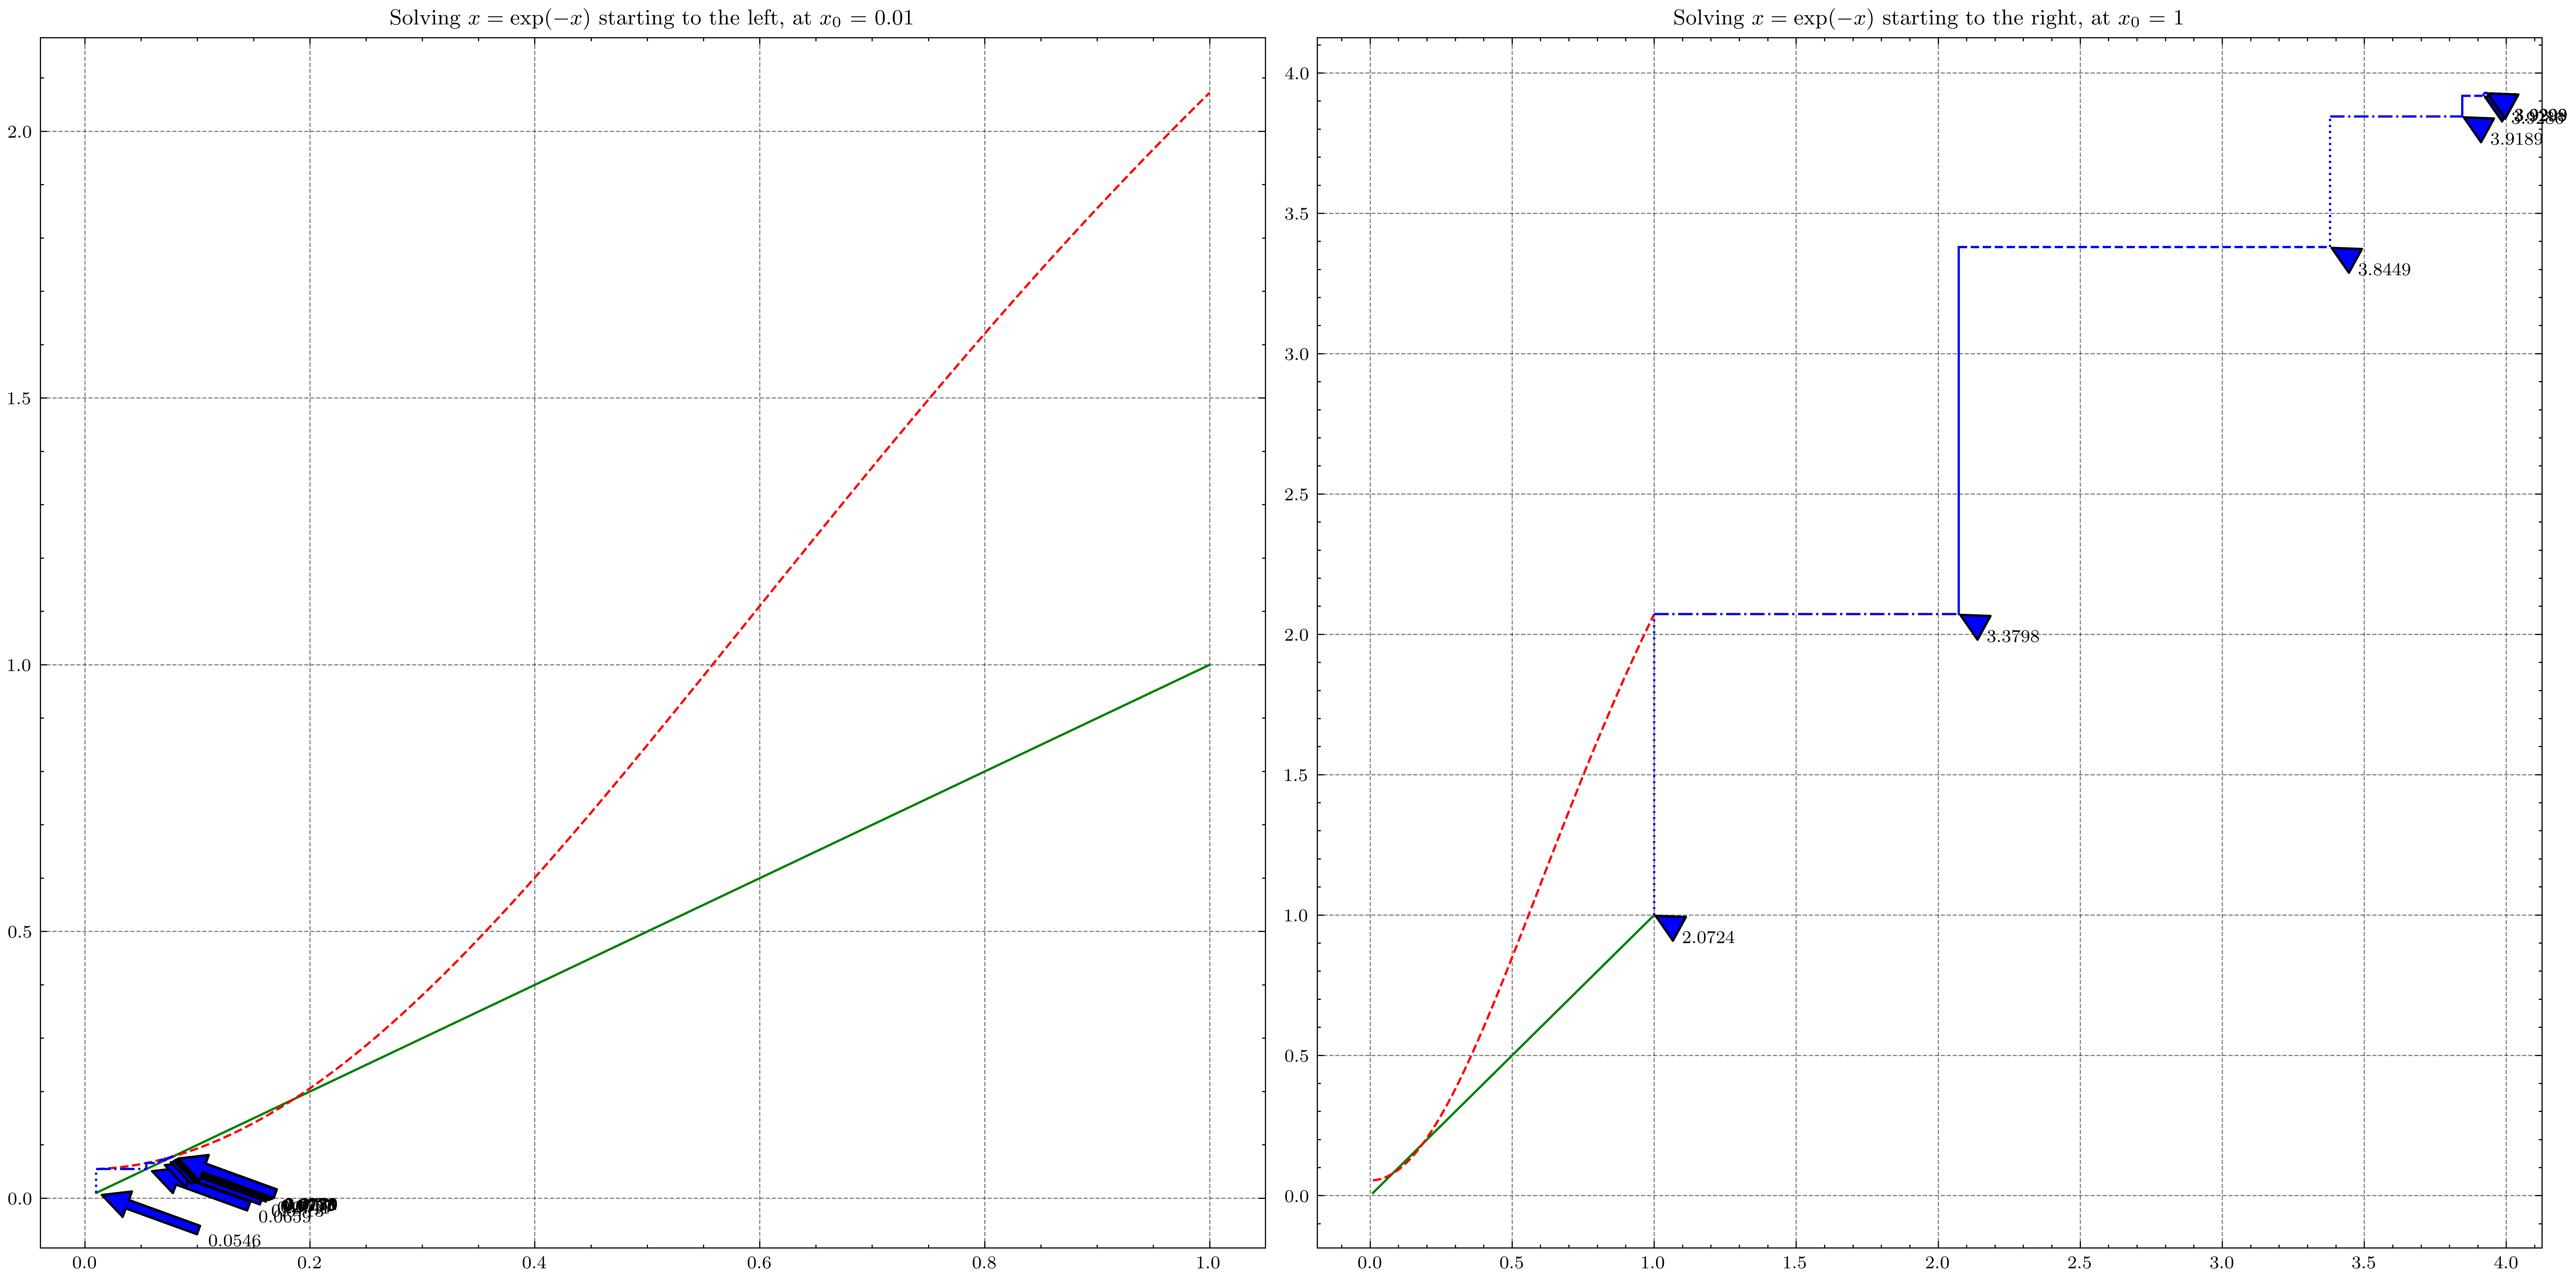

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Start at left
print(f"Solving x = g(x) starting to the left, at x_0 = {xi}")
x_k = xi
axs[0].set_title(f"Solving $x = \exp(-x)$ starting to the left, at $x_0$ = {xi}")
axs[0].plot(x, x, 'g', label='$y = x$')
axs[0].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[0].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[0].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[0].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[0].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    print(f"x_{k} = {x_k_plus_1:.4f}")

# Start at right
print(f"Solving x = g(x) starting to the right, at x_0 = {xf}")
x_k = xf
axs[1].set_title(f"Solving $x = \exp(-x)$ starting to the right, at $x_0$ = {xf}")
axs[1].plot(x, x, 'g', label='$y = x$')
axs[1].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[1].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[1].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[1].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[1].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    print(f"x_{k} = {x_k_plus_1:.4f}")

plt.tight_layout()
plt.show()

For this particular parameterization, we will see two roots $v_1 = 0.0781$ and $v_2=3.9299$.

## Q5: Power Method

In [16]:
from tabulate import tabulate # for printing matrix and vectors

In [15]:
def read_matrix_vector(filename):
    """Read the matrix and vector from a text file. Able to handle fractions."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    matrix = []
    for line in lines[:]: 
        line = line.strip()
        row = []
        for val in line.split():
            # Handle fractions
            if '/' in val:
                numerator, denominator = val.split('/')
                frac_val = Fraction(int(numerator), int(denominator))
                row.append(float(frac_val))
            else:
                row.append(float(val))
        matrix.append(row)
    
    return np.array(matrix)

In [17]:
filename = 'endsemmat.txt'
A = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╕
│  2 │ -1 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┤
│ -1 │  2 │ -1 │  0 │  0 │
├────┼────┼────┼────┼────┤
│  0 │ -1 │  2 │ -1 │  0 │
├────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  2 │ -1 │
├────┼────┼────┼────┼────┤
│  0 │  0 │  0 │ -1 │  2 │
╘════╧════╧════╧════╧════╛


In [18]:
class QREigendecomposition:
    """
    QR eigenvalue algorithm for symmetric matrices
    """

    def __init__(self, store_intermediate=False):
        self.eigenvalues = None
        self.eigenvectors = None
        self.store_intermediate = store_intermediate

    def qr_factorization(self, X):
        """
        Compute the QR factorization of a square matrix using gram-schmidt 
        orthonormalization.
        """

        X = X.T # want first index to be the column index (for convenience)

        q, r = np.zeros(X.shape), np.zeros(X.shape) # preallocate
        q[0] = X[0] / np.linalg.norm(X[0])
        r[0] = X @ q[0]
        for i in range(1, X.shape[0]):
            q[i] = X[i] - np.sum(np.dot(X[i], q[:i].T) * q[:i].T, axis=-1)
            q[i] /= np.linalg.norm(q[i])

            ## Update the upper triangular matrix R
            r[i, i:] = X[i:] @ q[i]
        
        q = q.T # because we took transpose beforehand for easier indexing
        return q, r

    def find_eigensystem(self, X, max_iter=2000, tol=1e-6):
        """
        Eigenvalues and eigenvectors of a matrix
        """
        prev = np.copy(X)
        tq = np.identity(X.shape[0])
        if self.store_intermediate: self.intermediate = [np.copy(X)]
        for i in range(max_iter):
            q, r = self.qr_factorization(X)
            
            X = r @ q 

            tq = tq @ q # accumulate the eigenvector matrix

            if self.store_intermediate: self.intermediate.append(np.copy(X))

            ## Check for convergence and stop early if converged
            if np.linalg.norm(X - prev) < tol:
                break
            prev = np.copy(X)
        eigenvalues, eigenvectors = np.diag(X), tq
        sort_inds = np.argsort(eigenvalues)
        eigenvalues, eigenvectors = eigenvalues[sort_inds], eigenvectors[:, sort_inds]
        self.eigenvalues, self.eigenvectors = eigenvalues, eigenvectors
        return eigenvalues, eigenvectors

In [31]:
QRSolver = QREigendecomposition(store_intermediate=True)
eigenvalues, eigenvectors = QRSolver.find_eigensystem(A)

eigenvalues_list = eigenvalues.tolist()
eigenvectors_list = eigenvectors.tolist()

In [35]:
print("Eigenvalues and eigenvectors (Calculated):")
print("\nEigenvalues:")
print(tabulate([["Eigenvalues"] + eigenvalues_list], tablefmt="fancy_grid"))
print("\nEigenvectors:")
print(tabulate(eigenvectors_list, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Analytical):

Eigenvalues:
╒═════════════╤═════════╤═══╤═══╤═══╤══════════╕
│ Eigenvalues │ 3.73205 │ 3 │ 2 │ 1 │ 0.267949 │
╘═════════════╧═════════╧═══╧═══╧═══╧══════════╛

Eigenvectors:
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│         1       │     1.73205     │     2           │     1.73205     │         1       │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         1.73205 │     1.73205     │     2.44929e-16 │    -1.73205     │        -1.73205 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         2       │     2.44929e-16 │    -2           │    -4.89859e-16 │         2       │
├─────────────────┼─────────────────┼────────

In [34]:
a = c = -1
b = 2
n = 5

# Initialize lists to store the eigenvalues and eigenvectors
eigenvalues = []
eigenvectors = []

# Loop over k
for k in range(1, n+1):
    # Calculate the eigenvalue
    eigenvalue = b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1))
    eigenvalues.append(eigenvalue)

    # Initialize the eigenvector
    eigenvector = []

    # Loop over i
    for i in range(1, n+1):
        # Calculate the component of the eigenvector
        component = 2 * np.sqrt(np.abs(c /a))**k * np.sin(i * k * np.pi / (n + 1))
        eigenvector.append(component)

    # Add the eigenvector to the list of eigenvectors
    eigenvectors.append(eigenvector)

print("Eigenvalues and eigenvectors (Analytical):")
print("\nEigenvalues:")
print(tabulate([["Eigenvalues"] + eigenvalues], tablefmt="fancy_grid"))
print("\nEigenvectors:")
print(tabulate(eigenvectors, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Analytical):

Eigenvalues:
╒═════════════╤═════════╤═══╤═══╤═══╤══════════╕
│ Eigenvalues │ 3.73205 │ 3 │ 2 │ 1 │ 0.267949 │
╘═════════════╧═════════╧═══╧═══╧═══╧══════════╛

Eigenvectors:
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│         1       │     1.73205     │     2           │     1.73205     │         1       │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         1.73205 │     1.73205     │     2.44929e-16 │    -1.73205     │        -1.73205 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         2       │     2.44929e-16 │    -2           │    -4.89859e-16 │         2       │
├─────────────────┼─────────────────┼────────

This verifies the two largest eigenvalues and eigenvectors for the given matrix.

## Q6 accept/reject

In [48]:
def acceptance_rejection(target_pdf, initial_pdf=None, n_samples=100000, range_start=0, range_end=1):
    """
    Generate random numbers from a target probability density function using
    the Acceptance-Rejection method within a specified range.

    Parameters:
        target_pdf (function): The target probability density function.
        initial_pdf (function): The initial probability density function.
                                Default is uniform distribution.
        n_samples (int): Number of samples to generate.
        range_start (float): Lower bound of the range for generating random numbers.
        range_end (float): Upper bound of the range for generating random numbers.

    Returns:
        Random samples from the target probability density function within the specified range.
    """
    if initial_pdf is None:
        initial_pdf = lambda x: 1  # Uniform distribution by default

    # Find c by evaluating the ratio at the highest value within the range
    x_values = np.linspace(range_start, range_end, 1000)
    
    max_ratio = max(target_pdf(x) / initial_pdf(x) for x in x_values)
    print("c =", max_ratio)
    
    samples = []
    success_count = 0

    for _ in range(n_samples):
        # Sample from the initial distribution within the specified range
        x = np.random.uniform(range_start, range_end)

        # Sample from uniform distribution for acceptance
        u = np.random.rand()

        # Acceptance condition
        if u <= target_pdf(x) / (max_ratio * initial_pdf(x)):
            samples.append(x)
            success_count += 1

    success_probability = success_count / n_samples
    average_iterations = 1 / success_probability if success_probability != 0 else float('inf')

    return samples, success_probability, average_iterations

In [56]:
a = 2

# target PDF and initial PDF
target_pdf = lambda x: 0.5 *(a**2 - x**2) if -a <= x <= a else 0
initial_pdf = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

samples, success_prob, avg_iterations = acceptance_rejection(target_pdf, initial_pdf)

# Success probability and average number of iterations required
print("Success probability:", success_prob)
print("Average iterations required:", avg_iterations)

c = 6.199097031183739
Success probability: 0.87436
Average iterations required: 6.21025664486024


## Q7 Variational Monte Carlo

In [41]:
# Simple Harmonic Oscillator
def psi(rho,alpha):
    if rho < 2 and rho > -2:
        return 0.5*(alpha**2 - rho**2)
def p(rho,alpha):
    return 0.25*(alpha**2 - rho**2)**2

def E(rho,alpha):
    return rho**7/7 - alpha**2*rho**5/5 + alpha**4*rho**3/3 + (alpha**2*rho - rho**2/3)

In [42]:
alpha_list = np.arange(0, 1.6, 0.01)
energy_list = []

for alpha in tqdm(alpha_list):
    rho = 1
    step_size = 0.8
    rho_list = [rho]
    accep = 0
    rej = 0 

    for _ in range(10000):
        old_prob = p(rho, alpha)
        rho_new = rho + (2 * np.random.uniform() - 1) * step_size
        new_prob = p(rho_new, alpha)
        gamma = np.random.uniform()

        if gamma < min(1, new_prob / old_prob):
            rho = rho_new
            rho_list.append(rho)
            accep += 1
        else:
            rej += 1

    rho_list = np.array(rho_list)
    Energy = E(rho_list, alpha)
    av_energy = Energy.mean()
    energy_list.append(av_energy)

  0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\hp\AppData\Local\Temp\ipykernel_22552\3019103117.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  if gamma < min(1, new_prob / old_prob):


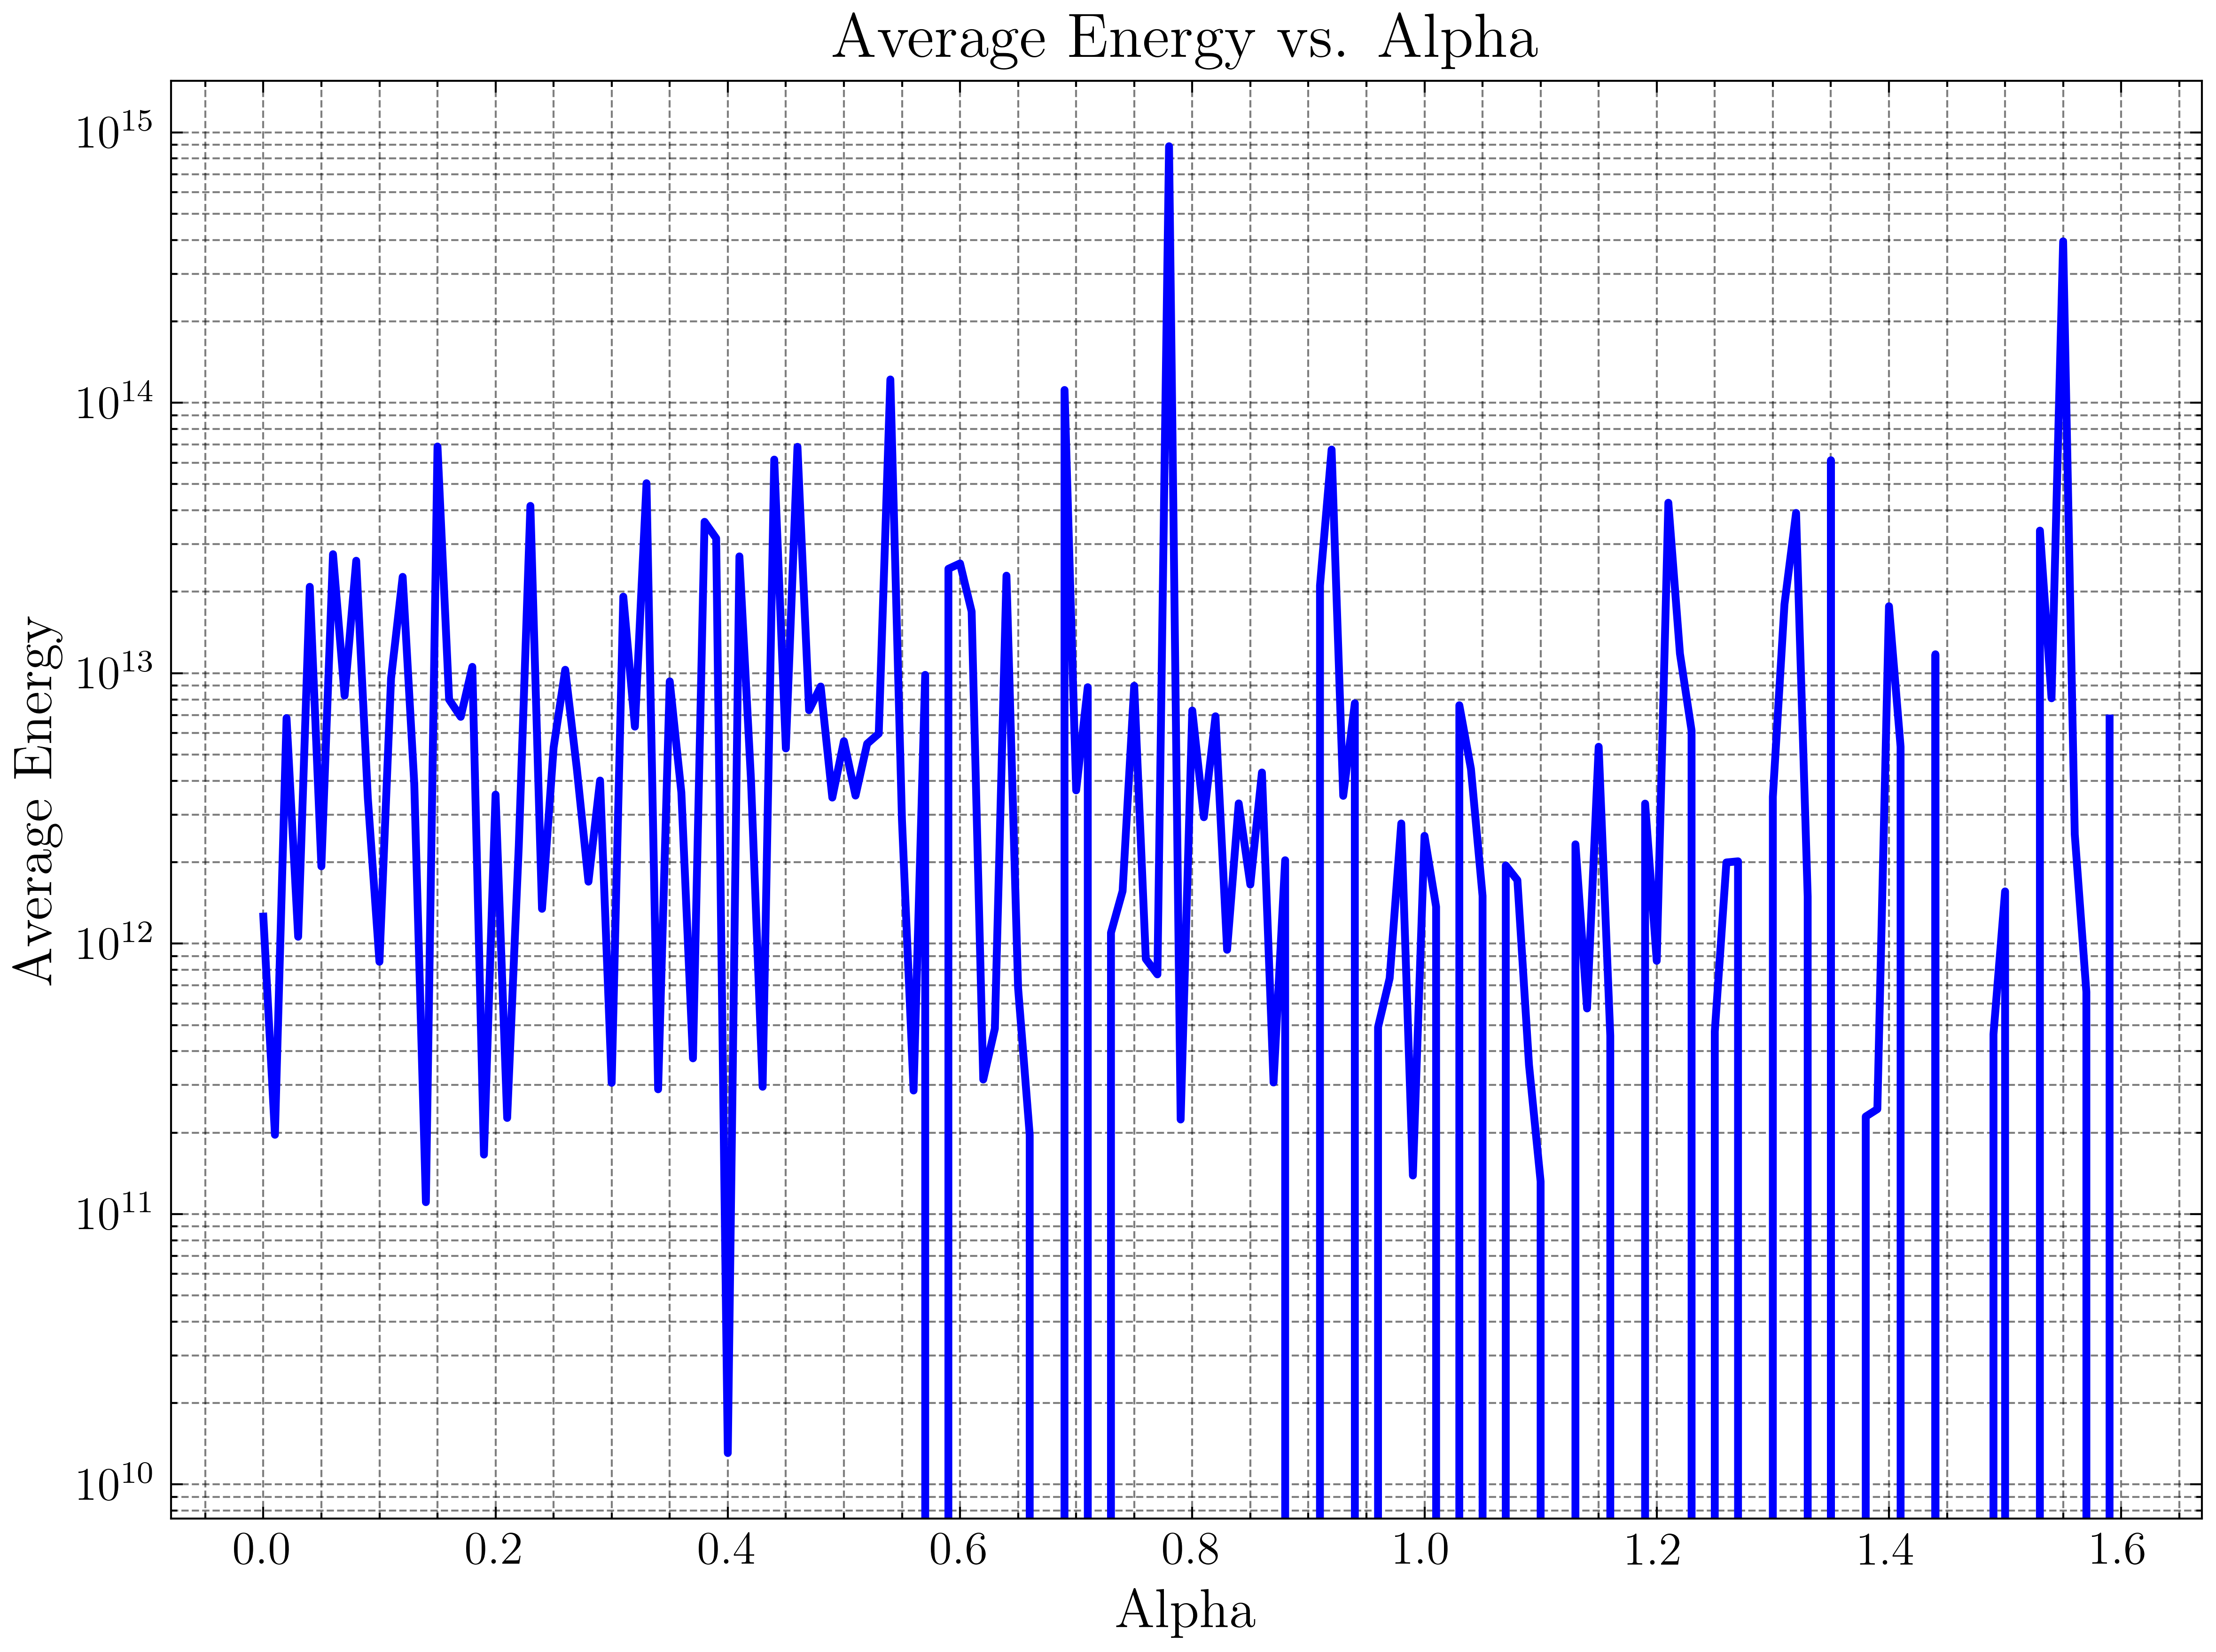

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_list, energy_list, color='blue', linewidth=2, linestyle='-')
plt.yscale("log")
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Average Energy', fontsize=14)
plt.title('Average Energy vs. Alpha', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
min_energy_index = np.argmin(energy_list)
min_energy = energy_list[min_energy_index]
corresponding_alpha = alpha_list[min_energy_index]

print("Minimum energy:", min_energy)
print("Corresponding alpha value:", corresponding_alpha)

Minimum energy: -67030688696579.516
Corresponding alpha value: 1.37


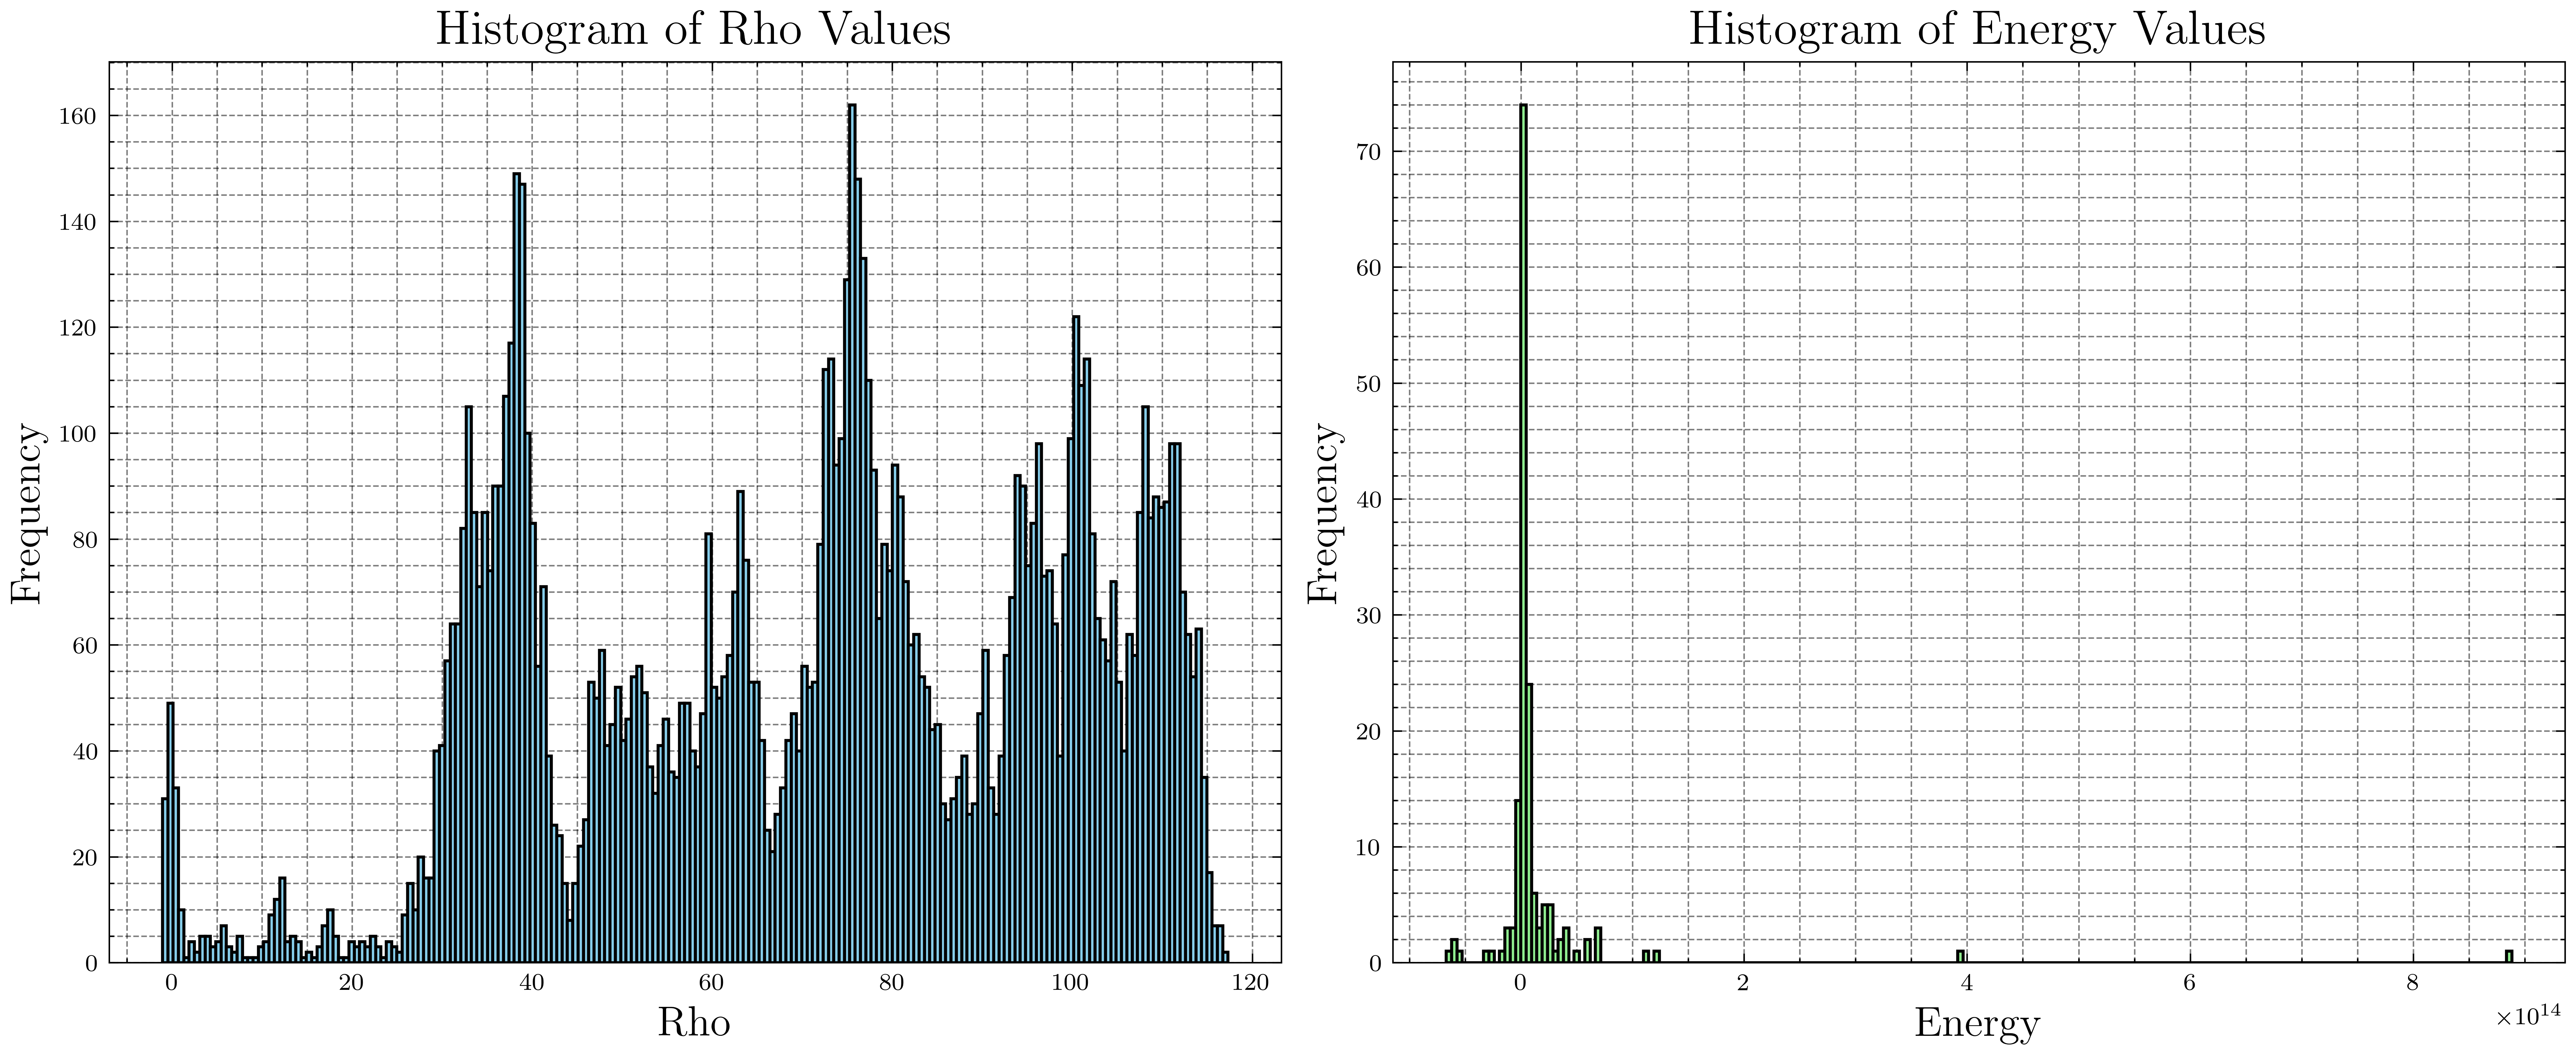

In [45]:
# Plotting histogram of rho_list
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(rho_list, bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Rho', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Rho Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Plotting histogram of energy_list
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(energy_list, bins=200, color='lightgreen', edgecolor='black')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Energy Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()